In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [30]:
image = cv.imread('test.png')
cv.imshow('img',image)
cv.waitKey(0)

-1

In [8]:
print(image.shape)
print(image.size)
print(image.dtype)

(512, 512, 3)
786432
uint8


Text(0.5, 1.0, 'B')

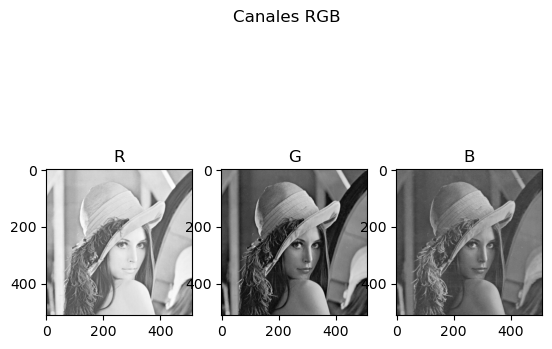

In [17]:
#Separar todos los canales que tiene la imagen
b,g,r = cv.split(image)
b.shape
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.suptitle("Canales RGB")
ax1.imshow(r,cmap="gray",vmin=0,vmax=255)
ax1.set_title("R")
ax2.imshow(g,cmap="gray",vmin=0,vmax=255)
ax2.set_title("G")
ax3.imshow(b,cmap="gray",vmin=0,vmax=255)
ax3.set_title("B")

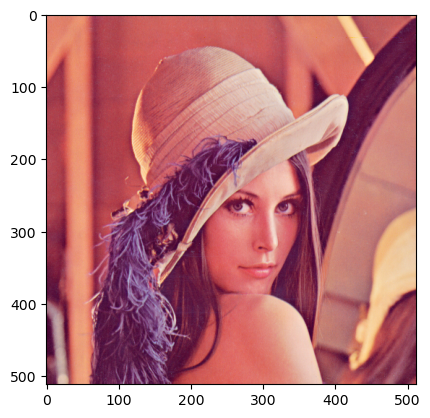

In [28]:
merged = cv.merge([r,g,b])
plt.imshow(merged)

H min: 59  H max: 255  H media: 180.43065643310547
S min: 5  S max: 246  S media: 133.30436325073242
V min: 0  V max: 179  V media: 92.25908279418945


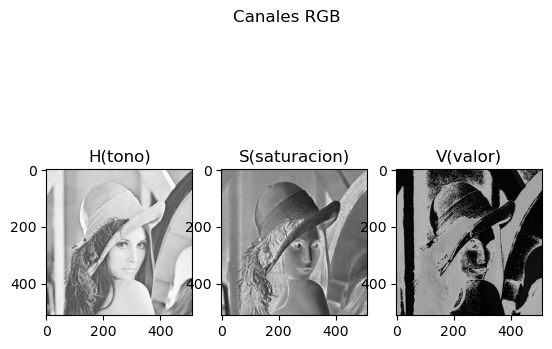

In [32]:
image = cv.cvtColor(image,cv.COLOR_BGR2HSV)

h,s,v = cv.split(image)
# h = image[:,:,0]
# s = image[:,:,1]
# v = image[:,:,2]

b.shape
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.suptitle("Canales RGB")
ax1.imshow(h,cmap="gray",vmin=0,vmax=255)
ax1.set_title("H(tono)")
ax2.imshow(s,cmap="gray",vmin=0,vmax=255)
ax2.set_title("S(saturacion)")
ax3.imshow(v,cmap="gray",vmin=0,vmax=255)
ax3.set_title("V(valor)")
print(f"H min: {h.min()}  H max: {h.max()}  H media: {h.mean()}")
print(f"S min: {s.min()}  S max: {s.max()}  S media: {s.mean()}")
print(f"V min: {v.min()}  V max: {v.max()}  V media: {v.mean()}")

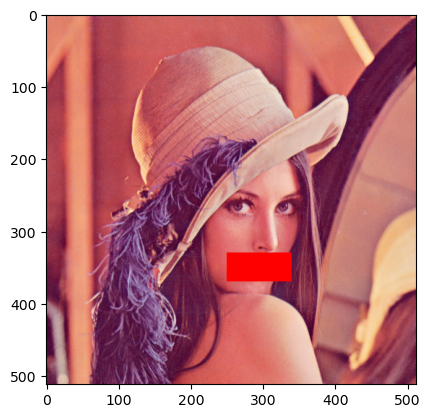

In [29]:
image = cv.imread('test.png')
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)


#linea blanca a la altura de 100
#con bucle
# for i in range(image.shape[1]):
#     image[100,i] = [255,255,255]
#sin bucle
# image[100,:,:] = [255,255,255]

#linea negra vertical en 50
# image[:,50,:] = [0,0,0]

#zona resaltada en rojo
image[330:370,250:340,:] = [255,0,0]

plt.imshow(image)

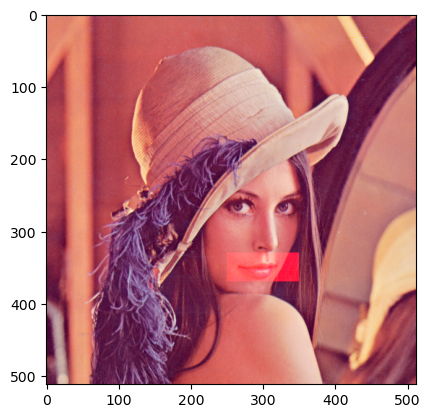

In [40]:
image = cv.imread('test.png')
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
image[330:370,250:350,0] = np.full((40,100), 255, dtype=np.uint8)
plt.imshow(image)

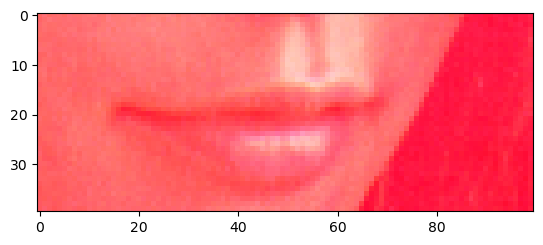

In [41]:
#hacer una nueva imagen
boca = image[330:370, 250:350]
plt.imshow(boca)

min: 25.0 en (508, 71) max: 245.0 in (116, 273)
Media: [[124.0485611]] DesStd: [[47.85559963]]


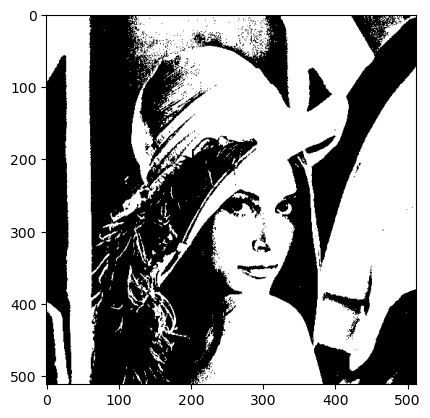

In [51]:
image = cv.imread('test.png')
image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

min,max,minloc,maxloc = cv.minMaxLoc(image)
print(f"min: {min} en {minloc} max: {max} in {maxloc}")

means,stddev = cv.meanStdDev(image)
print((f"Media: {means} DesStd: {stddev}"))

#binarizando
image[np.where(image<means)]=0
image[np.where(image>=means)]=255

plt.imshow(image,cmap="gray")

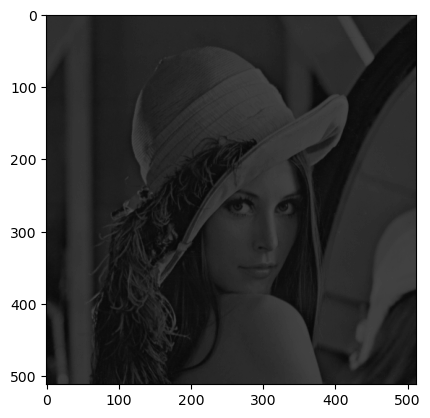

In [59]:
image = cv.imread('test.png')
image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

gris = np.float32(image)
destino = np.zeros(gris.shape,dtype=np.float32)
# ret = cv.normalize(gris,dst=destino,alpha=0.0,beta=100,norm_type=cv.NORM_MINMAX)
# ret = cv.normalize(gris,dst=destino,alpha=1,beta=100,norm_type=cv.NORM_INF)
ret = cv.normalize(gris,dst=destino,alpha=1,beta=100,norm_type=cv.NORM_L1)


plt.imshow(destino*10000000,cmap="gray",vmin=0,vmax=255)